<a href="https://colab.research.google.com/github/abh2050/Codes-/blob/master/Statistical_experiments_significance_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A/B Testing: 
Hypothesis Tests/Significanace Tests

In [1]:
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import math as mt
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
from pandas.core.frame import DataFrame
def permutation_function(dataframe,data_col,grouping_coll,iterations,statistic_function):
  output={}

  groups = dataframe[grouping_coll].value_counts().index
  values = dataframe[grouping_coll].value_counts()

  for x in range(iterations):
    for i in groups:
      sample_amount = dataframe[grouping_coll].value_counts()[i]
      sample_data =dataframe[data_col].sample(sample_amount,replace=False).to_list()
      sample_metric = statistic_function(sample_data)
      try:
        output[i].append(sample_metric)
      except (KeyError,AttributeError):
        output[i]= [sample_metric]

  final_output = pd.DataFrame(output)
  return final_output

In [3]:
from google.colab import files
uploaded = files.upload()



Saving ab_data.csv to ab_data.csv


In [4]:
ab_test_data_import = pd.read_csv("ab_data.csv")
ab_test_data_import

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [19]:
#data Cleaning procedure
i = ab_test_data_import[
    (
        (ab_test_data_import["group"]=='treatment')==(ab_test_data_import['landing_page']=="new_page")
    )
    ==False
].index
df2 = ab_test_data_import.drop(i)
df2["group_landing_page"]=df2["group"]+df2["landing_page"]
df2

,user_id,timestamp,group,landing_page,converted,group_landing_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,controlold_page
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,controlold_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,treatmentnew_page
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,treatmentnew_page
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,controlold_page
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,controlold_page
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,controlold_page
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,controlold_page
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,controlold_page


In [22]:
permutation_data=permutation_function(df2,"converted","group",5000, np.mean)
permutation_data

,treatment,control
0,0.119977,0.119306
1,0.118945,0.119436
2,0.120094,0.119423
3,0.120025,0.118989
4,0.118979,0.119436
...,...,...
4995,0.119550,0.119898
4996,0.119055,0.119312
4997,0.119433,0.119870
4998,0.119853,0.119292


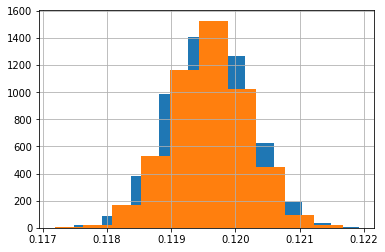

In [23]:
permutation_data["treatment"].hist()
permutation_data["control"].hist()

A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

In [26]:
#t-test
res = ss.ttest_ind(df2[df2["group"]=="control"]["converted"],
                   df2[df2["group"]=="treatment"]["converted"],
                   equal_var=False)

print(f'p-value for simple sided test:{res.pvalue/2:.4f}')

p-value for simple sided test:0.0948


Since the p-value is less than 0.05, we will have to reject the null hypothesis and accept the alternative hypothesis

In [27]:
from google.colab import files
uploaded = files.upload()


Saving click_rates.csv to click_rates.csv


In [29]:
four_season=pd.read_csv("click_rates.csv")
four_season

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988
